In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import statsmodels.api as sm

from statsmodels.formula.api import ols

import numpy as np

#Data Cleanup
df = pd.read_csv(r"SuperStoreOrders.csv")
df['order_date'] = pd.to_datetime(df['order_date'],format='mixed')
df['ship_date'] = pd.to_datetime(df['ship_date'],format='mixed')
df['sales']=df['sales'].str.replace(',','').astype('int64')
# operating on the assumption that the sales and profit column are in dollars

C:\Users\Jesse\AppData\Local\Temp\ipykernel_24436\2962979680.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=45,ha='right')
C:\Users\Jesse\AppData\Local\Temp\ipykernel_24436\2962979680.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[0].get_xticklabels(),rotation=45,ha='right')


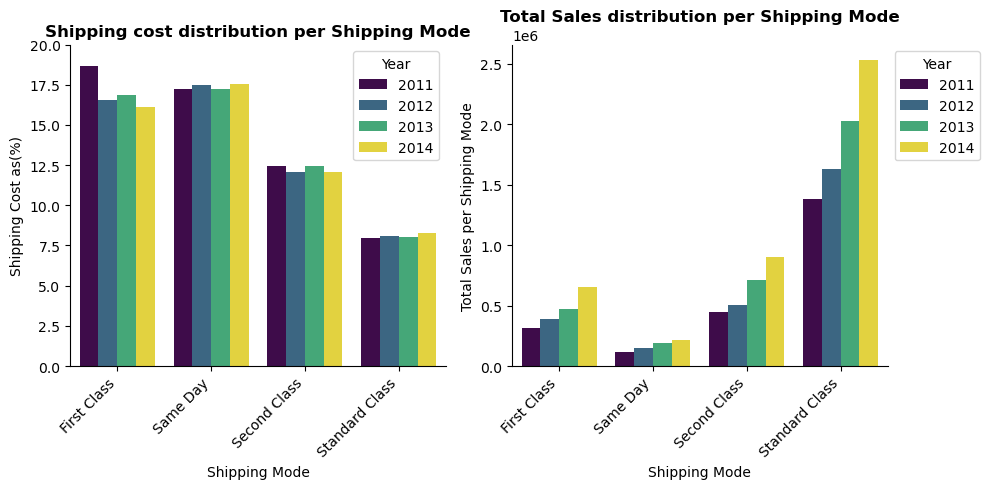

In [2]:
fig, ax=plt.subplots(1,2,figsize=(10,5))

df_ship_perc=df.pivot_table(values=['sales','shipping_cost'],index=['ship_mode','year'],aggfunc='sum')
df_ship_perc['shipping_cost_percentage']=(df_ship_perc['shipping_cost']/df_ship_perc['sales'])*100
df_ship_perc
sns.barplot(data=df_ship_perc,x='ship_mode',y='shipping_cost_percentage',ax=ax[0],hue='year',palette='viridis')
sns.despine()
ax[0].set_ylabel('Shipping Cost as(%)')
ax[0].set_xlabel('Shipping Mode')
ax[0].legend(loc='best',title='Year',bbox_to_anchor=(1,1))
ax[0].set_title('Shipping cost distribution per Shipping Mode',fontweight='bold')
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=45,ha='right')
ax[0].set_ylim(0,20)

df_piv = df.pivot_table(values=['sales','shipping_cost'],index=['ship_mode','year'],aggfunc='sum').sort_values(by='ship_mode')
sns.barplot(data=df_piv,x='ship_mode',y='sales',hue='year',ax=ax[1],palette='viridis')
sns.despine()
ax[1].set_ylabel('Total Sales per Shipping Mode')
ax[1].set_xlabel('Shipping Mode')
ax[1].legend(loc='best',title='Year',bbox_to_anchor=(1,1))
ax[1].set_title('Total Sales distribution per Shipping Mode',fontweight='bold')
ax[1].set_xticklabels(ax[0].get_xticklabels(),rotation=45,ha='right')

plt.tight_layout()
plt.show()

In [3]:
df_piv=df.pivot_table(values='sales',index=['market','year'],aggfunc=['count','mean']).reset_index()
df_piv['count_growth_rate'] = df_piv.groupby('market')['count'].pct_change()*100
df_piv['mean_count_growth_rate'] = df_piv.groupby('market')['count_growth_rate'].transform('mean')
# Flatten the columns
df_piv.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in df_piv.columns]
df_piv= df_piv.rename(columns={'market_':'market', 'year_':'year','count_growth_rate_':'count_growth_rate',
       'mean_count_growth_rate_':'mean_count_growth_rate'})
df_piv

df_piv_mean=df_piv.drop(labels=['count_sales','count_growth_rate'],axis=1)
df_piv_mean=df_piv_mean.groupby('market')[['mean_sales','mean_count_growth_rate']].mean().reset_index().sort_values(by='mean_count_growth_rate',ascending=False)
mean_list=df_piv_mean['mean_sales'].to_list()



C:\Users\Jesse\AppData\Local\Temp\ipykernel_24436\3753780008.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=45,ha='right')
C:\Users\Jesse\AppData\Local\Temp\ipykernel_24436\3753780008.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[0].get_xticklabels(),rotation=45,ha='right')


<function matplotlib.pyplot.show(close=None, block=None)>

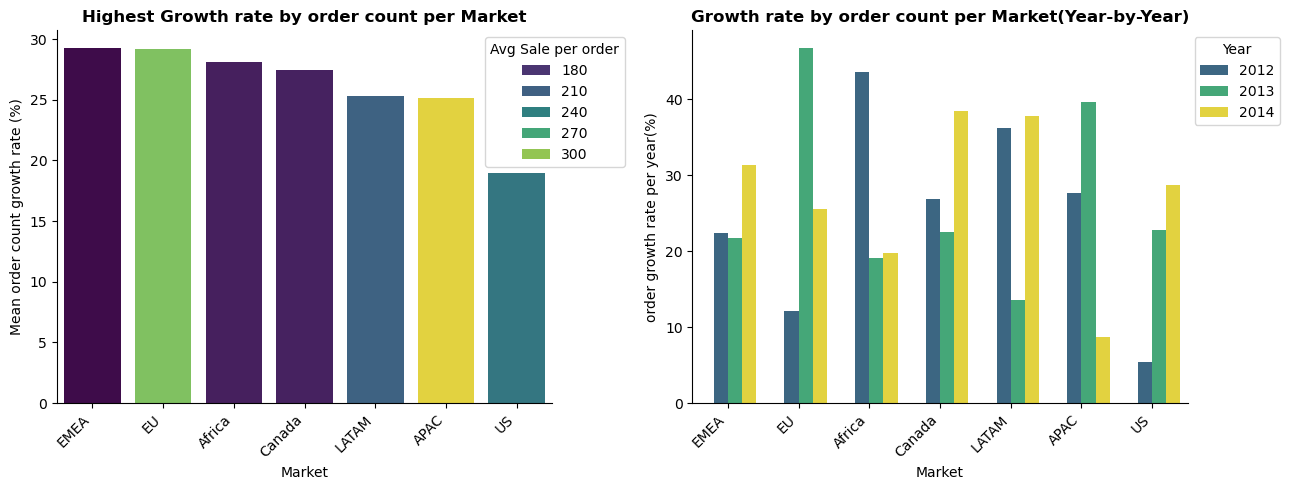

In [4]:
fig, ax=plt.subplots(1,2,figsize=(13,5))

sns.barplot(data=df_piv_mean,x='market',y='mean_count_growth_rate',ax=ax[0],hue='mean_sales',palette='viridis')
sns.despine()
ax[0].set_ylabel('Mean order count growth rate (%)')
ax[0].set_xlabel('Market')
ax[0].legend(loc='best',title='Avg Sale per order',bbox_to_anchor=(0.85,1))
ax[0].set_title('Highest Growth rate by order count per Market',fontweight='bold')
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=45,ha='right')

sns.barplot(data=df_piv,x='market',y='count_growth_rate',ax=ax[1],hue='year',palette='viridis')
sns.despine()
ax[1].set_ylabel('order growth rate per year(%)')
ax[1].set_xlabel('Market')
handles, labels=ax[1].get_legend_handles_labels()
index_to_remove = labels.index('2011') if '2011' in labels else None
if index_to_remove is not None:
    handles.pop(index_to_remove)
    labels.pop(index_to_remove)
    
ax[1].legend(handles,labels,loc='best',title='Year',bbox_to_anchor=(1,1))
ax[1].set_title('Growth rate by order count per Market(Year-by-Year)',fontweight='bold')
ax[1].set_xticklabels(ax[0].get_xticklabels(),rotation=45,ha='right')

plt.tight_layout()
plt.show